In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importation des outils qu'on utilisera pour analyser nos données. En particulier, on utilisera :
* Pandas pour importer nos données à partir d'un fichier csv
* NumPy pour manipuler nos données sous forme de matrices
* PyPlot et Seaborn pour représenter graphiquement les données 

In [5]:
df = pd.read_csv("../library/Iris.csv")

Notre dataset (ou jeu de données) est un tableau contenant les caractéristiques de 150 fleurs d'Iris. Notre objectif sera de déterminer l'espèce d'Iris (virginica, setosa, versicolor) à partir des autres caractéristiques. Pour ce faire, nous allons construire un modéle prédictif ! 

In [7]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Après importation du dataset, on vérifie qu'il ne contient pas de valeurs nulles (=cases vides dans certaines colonnes). En effet, les valeurs nulles peuvent impacter (parfois significativement) la fiabilité des prédictions de nos algorithmes de Machine Learning. Il existe plusieurs solutions pour éviter ce problème, comme remplacer les valeurs nulles par la moyenne ou la médiane de leur série statistique.

Il est important de bien connaitre le dataset pour obtenir un modèle prédictif fiable et précis. Commençons par étudier les types des variables : 

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Notre dataset contient différentes caractéristiques de nos Iris :
* Longeur des sépales en cm (SepalLengthCm)
* Largeur des sépales en cm (SepalWidthCm) 
* Longeur des pétales en cm (PetalLengthCm)
* Largeur des pétales en cm (PetalWidthCm)
* Espèce de l'Iris (Species)  
  
Voyons ceci dans un échantilon de notre dataset :

In [9]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
115,116,6.4,3.2,5.3,2.3,Iris-virginica
16,17,5.4,3.9,1.3,0.4,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
116,117,6.5,3.0,5.5,1.8,Iris-virginica
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


Intéressons-nous ensuite à quelques indicateurs statistiques : 

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Pour bâtir notre modèle prédictif, il est important de bien choisir les variables (également appelées *features* ) sur lesquelles nous allons nous baser pour effectuer nos prédictions. L'**Id** n'ayant logiquement pas de corrélation avec le type d'Iris, nous allons le retirer afin d'éviter des problèmes d'overfitting :

In [14]:
df = df.drop(['Id'], axis=1) 

Maintenant, essayons de déterminer les variables de notre modèle prédictif, c'est à dire les attributs à partir desquels il est le plus fiable de prédire le type d'Iris. Pour cela, nous allons utiliser le **pairplot** de Seaborn :

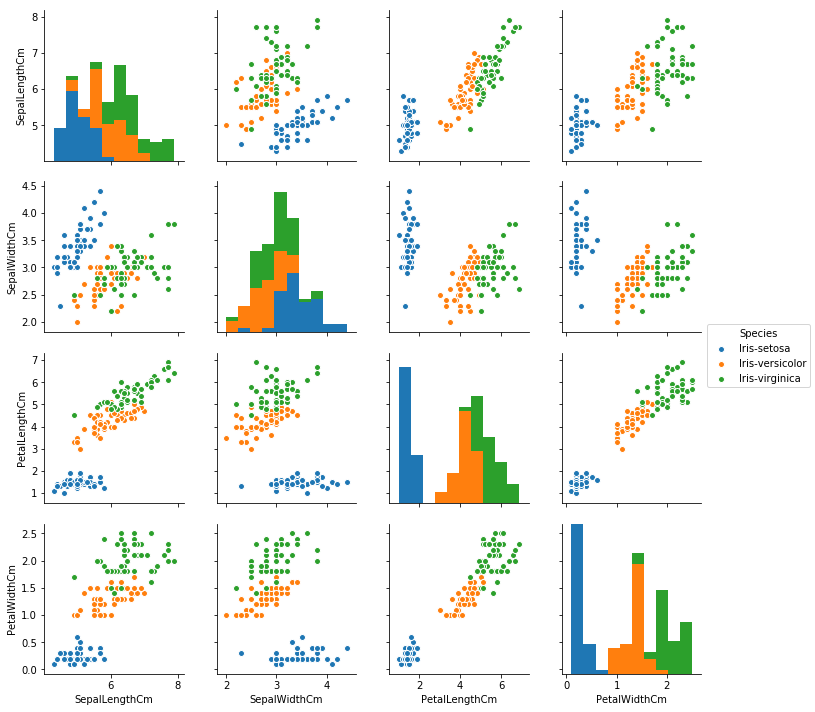

In [15]:
sns.pairplot(df, hue='Species')

On constate ici que les espèces d'Iris se distinguent plutot bien avec les variables retenues ! Par la suite, nous allons donc essayer de classifier nos fleurs à partir de ces variables. 

In [19]:
from sklearn.model_selection import train_test_split 

inputs = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
outputs = df['Species'].values

(train_inputs, test_inputs, train_outputs, test_outputs) = train_test_split(inputs, output, train_size=0.8, random_state=1)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Dans le but de garder cette introduction simple et accesible, on opte ici pour un arbre de décision (**DecisionTreeClassifier**) comme algorithme de prédiction. Mais il en existe bien d'autres !  
On sépare ensuite notre dataset entre l'attribut qu'on souhaite prédire (**Species**) et les attributs sur lesquels on compte se baser pour effectuer les prédictions (**SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm**).  
Enfin, on sépare encore une fois notre dataset en 2 : les données sur lesquelles l'algorithme va s'entrainer et "apprendre" (**train_inputs** et **train_outputs**), et les données sur lesquelles nous allons mettre notre modèle à l'épreuve (**test_inputs** et **test_outputs**) en testant la fiabilité de ses prédictions !

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_outputs)
dtc.score(test_inputs, test_outputs)

0.96666666666666667

Notre modèle atteint environ 97% de fiabilité. Beau travail ! 